In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import csv
import pandas as pd

def make_points(n):
    '''Generate set of points (sites) on a 2d plane
    using a normal distribution.  
    
    n - number of points

    returns: a set of points (demand) by writing to a file 'demand.csv'

    '''

    np.random.seed(123)

    mu, sigma = 0, 1 
    xs = np.random.normal(mu, sigma, n) 
    ys = np.random.normal(mu, sigma, n) 

    plt.scatter(xs, ys)

    # convert to lat/lng for saving
    ss = np.vstack([xs.ravel(),ys.ravel()]).T

    # add id
    ss = np.append(ss, np.arange(0, ss.shape[0]).reshape(ss.shape[0],1), axis=1)

    # re-arrange id 
    permutation = [2, 0, 1]
    idx = np.empty_like(permutation)
    idx[permutation] = np.arange(len(permutation))
    ss[:] = ss[:, idx]

    #np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(5,2)
    #dem_id = np.array(['d_' + str(x) for x in np.arange(0, len(xs))]).reshape(len(xs),1)
    #dem_id = list(itertools.chain(dem_id))
    #dem_id = map(str, dem_id)
    #ss = np.append(ss, dem_id, axis=1)
    
    # save to demand 
    #fmt = ['%f', '%f', '%i']
    fmt = ['%i', '%f', '%f']
    np.savetxt('demand.csv', ss, delimiter=',', header='x,y,demand_id', comments='', fmt=fmt)


def make_grid(q):
    '''generate regular grid over 2d space
    
    q - number of quadrants (cells) on the grid 

    returns: P(ID, X, Y)
    writes: array to file

    '''

    n = q + 2 # the start and endpoint are always on 0/1

    nx, ny = n, n

    x = np.linspace(0,1,nx)
    y = np.linspace(0,1,nx)
    x = x[1:len(x)-1]
    y = y[1:len(y)-1]

    xx, yy = np.meshgrid(x,y)

    ss = np.vstack([xx.ravel(),yy.ravel()]).T

    # add id
    ss = np.append(ss, np.arange(0,ss.shape[0]).reshape(ss.shape[0],1), axis=1)
    
    # plot and save a plot
    plt.scatter(ss[:,0],ss[:,1])

    # save to file
    np.savetxt('facility.csv', ss, delimiter=',', header='x,y,facility_id', comments='')


def find_covered(fac, sites, threshold):

    '''For each facility (F) and demand point (D) calculate the pairwise distance. 
    
    fac, sites - 2d array with xy-coords
    
    return: data in the form: F: {D1, D2, D3}
    
    ''' 

    dist_matrix = cdist(x, y)

    rows = dist_matrix.shape[0]
    cols = dist_matrix.shape[1]

    lst_array = []
    dict_fac = {}

    for i in range(0,rows):
        for j in range(0,cols):
            lst_array.append([i,j,dist_matrix[i,j]])
            if arr[i,j]<=1: # if within threshold
                key = str(i)
                dict_fac.setdefault(key, []).append(j)

    stacked = np.vstack(lst_arr)

    # add id
    stacked = np.append(stacked, np.arange(0,stacked.shape[0]).reshape(stacked.shape[0],1), axis=1)
    
    # save pairwise distance to file 
    np.savetxt('pairwise_dist.csv', stacked, delimiter=',', header='facility,demand,dist,d', comments='')

    # save dictionary to file 
    with open('dict.csv', 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in dict_fac.items():
            writer.writerow([key, value])




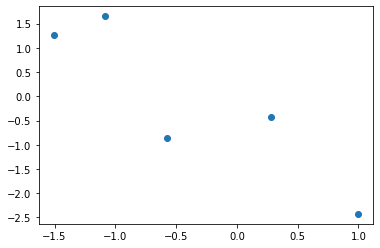

In [14]:
make_points(5)

(0.0, 1.0)

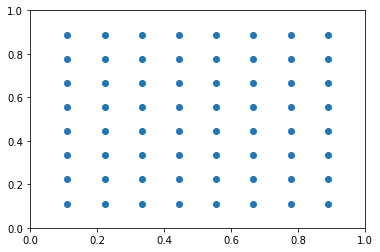

In [49]:

n = 10
nx, ny = n, n

x = np.linspace(0,1,nx)
y = np.linspace(0,1,nx)
x = x[1:len(x)-1]
y = y[1:len(y)-1]

xx, yy = np.meshgrid(x,y)

plt.scatter(xx,yy)
plt.xlim(0,1)
plt.ylim(0,1)

(64, 2)


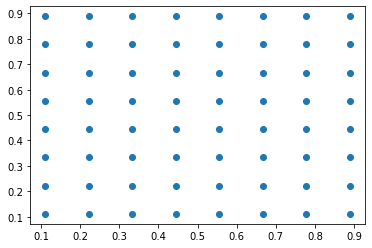

In [76]:
ss = np.vstack([xx.ravel(),yy.ravel()])
ss = ss.T
print(ss.shape)

plt.scatter(ss[:,0],ss[:,1])

In [3]:
import numpy as np
arr = np.repeat([1,2,3], 3).reshape(3,3)
print(arr)

rows = arr.shape[0]
cols = arr.shape[1]

#new_array = np.empty([rows**cols, 3])

lst_arr = []
dict_fac = {}

for i in range(0,rows):
    for j in range(0,cols):
        #print(i, '-->', j, '=', arr[i,j])
        lst_arr.append([i,j, arr[i,j]])
        if arr[i,j]<=1:
            key = i#str(i)
            dict_fac.setdefault(key, []).append(j)

print(dict_fac)

stacked = np.vstack(lst_arr)

# add id 
stacked = np.append(stacked, np.arange(0,stacked.shape[0]).reshape(stacked.shape[0],1), axis=1)
#print(stacked.shape)
#print(stacked)

np.savetxt('test.csv', stacked, delimiter=',', header='a,b,c,d', comments='')




[[1 1 1]
 [2 2 2]
 [3 3 3]]
{0: [0, 1, 2]}


In [217]:
#repa = np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(10,1)
import itertools

repa = np.array(['d_'+str(x) for x in np.arange(0,10)]).reshape(10,1)

list(itertools.chain(*repa))

['d_0', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9']

In [4]:
from collections import defaultdict
data = [(2010, 2), (2009, 4), (1989, 8), (2009, 7)]
d = defaultdict(list)
print(d)

for year, month in data:
    d[year].append(month)

d

defaultdict(<class 'list'>, {})


defaultdict(list, {2010: [2], 2009: [4, 7], 1989: [8]})

In [5]:
import pickle 

with open('covered.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)

print(unserialized_data)

defaultdict(<class 'list'>, {0: [27], 1: [27, 28], 2: [28], 3: [46], 4: [20, 46], 5: [0, 20], 6: [0, 15, 20, 24], 7: [15, 37], 8: [37], 10: [17, 27], 11: [27, 28], 12: [28], 13: [18, 46, 48], 14: [18, 46, 48], 15: [0, 20], 16: [0, 15], 19: [17, 30], 20: [17], 21: [42], 22: [5, 42], 23: [5, 36, 48], 24: [18, 48, 49], 25: [49], 26: [4], 28: [38], 29: [30], 31: [42], 32: [5, 36, 42], 33: [5, 33, 36, 39], 34: [33, 39, 49], 35: [4, 49], 36: [4], 38: [6, 38, 47], 42: [9], 43: [9, 33, 39], 44: [3, 33, 39], 48: [6, 47], 50: [2], 51: [2, 25, 26], 52: [9, 25, 26, 32], 53: [3, 9, 12, 19, 26, 32], 54: [3, 19], 55: [3], 56: [11, 22], 57: [11, 44], 58: [44], 59: [13], 60: [2, 45], 61: [2, 10, 25, 45], 62: [10, 12, 25, 26, 31], 63: [12, 31, 32], 64: [3, 19], 65: [7, 22, 23, 29, 40], 66: [7, 11, 22], 67: [22, 44], 68: [44], 69: [13, 16], 70: [16, 45], 71: [1, 10, 16, 45], 72: [10, 31, 43], 73: [31, 43], 74: [23, 29, 40], 75: [7, 23, 29, 40], 76: [7], 80: [16], 81: [1, 35], 82: [1, 14, 35, 43], 83: [8,

In [12]:
for k, v in unserialized_data.items():
    for i in v:
        print(i)

27
27
28
28
46
20
46
0
20
0
15
20
24
15
37
37
17
27
27
28
28
18
46
48
18
46
48
0
20
0
15
17
30
17
42
5
42
5
36
48
18
48
49
49
4
38
30
42
5
36
42
5
33
36
39
33
39
49
4
49
4
6
38
47
9
9
33
39
3
33
39
6
47
2
2
25
26
9
25
26
32
3
9
12
19
26
32
3
19
3
11
22
11
44
44
13
2
45
2
10
25
45
10
12
25
26
31
12
31
32
3
19
7
22
23
29
40
7
11
22
22
44
44
13
16
16
45
1
10
16
45
10
31
43
31
43
23
29
40
7
23
29
40
7
16
1
35
1
14
35
43
8
14
43
8
23
21
21
41
1
35
14
34
35
8
14
34
8
21
21


In [169]:
import csv

def get_covered(r):
    """For each facility find the demand points that are covered given 
    a distance threshold radius (r)
    
    r(int) - radius 

    saves: covered in dict format like so:
    1: [1,2,3]
    2: [1]

    """
    dist_matrix = np.genfromtxt('distance_matrix.csv', delimiter=',')
    demand = np.genfromtxt('demand.csv', delimiter=',', skip_header=1)

    rows = dist_matrix.shape[0]
    cols = dist_matrix.shape[1]

    lst_array = []
    #dict_fac = {}
    dict_fac = defaultdict(list)
    dict_dem = {}

    for i in range(0,rows): # for each potential facility (n=100)
        for j in range(0,cols): # for each demand point (n=50)
            lst_array.append([i,j,dist_matrix[i,j]])
            print(i, j, dist_matrix[i,j])
            
            # if within threshold add to dictionary 
            if dist_matrix[i,j]<=r: 
                dict_fac[i].append(j)
            # if dist_matrix[i,j]<=r and i in dict_fac: 
            #     #key = i
            #     #dict_fac.setdefault(key, []).append(j)
            #     dict_fac[i].append(j)
            # elif dist_matrix[i,j]<=r:
            #     dict_fac[i] = [j]

    stacked = np.vstack(lst_array)

    # run through the dictionary and calculate total covered pop
    list_pop = []
    for k,v in dict_fac.items():
        s = 0
        for i in v:
            s = s + demand[i,2]
        #dict_dem[k] = s
        list_pop.append([k, s])
    #print(dict_dem)
    stacked_pop = np.vstack(list_pop)

    # convert to array 
    #array_of_total = np.array(list(dict_fac.items()), dtype=dtype)
    #array_of_total = np.fromiter(dict_fac.items(), dtype=float, count=len(dict_fac))
    #print(array_of_total)
    # save to file 
    fmt = ['%i', '%f']
    np.savetxt('total_pop.csv', stacked_pop, delimiter=',', header='facility,total_pop', comments='', fmt=fmt)            

    # add id
    #stacked = np.append(stacked, np.arange(0,stacked.shape[0]).reshape(stacked.shape[0],1), axis=1)
    
    # save pairwise distance to file 
    fmt = ['%i', '%i', '%f']
    np.savetxt('pairwise_dist.csv', stacked, delimiter=',', header='facility,demand,dist', comments='', fmt=fmt)

    # save dict to file 
    # with open('covered.txt', 'w') as file:
    #     file.write(json.dumps(dict_fac)) # use `json.loads` to do the reverse
    with open('covered.csv', 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in dict_fac.items():
            writer.writerow([key, value])
    
    with open('covered.pickle', 'wb') as handle:
        pickle.dump(dict_fac, handle, protocol=pickle.HIGHEST_PROTOCOL)

get_covered(0.1)

0 0 0.6062888684447373
0 1 0.7609040540856646
0 2 0.5298857180232357
0 3 0.6467101994842821
0 4 0.6771400258624504
0 5 0.3947330791218288
0 6 0.9477297134700378
0 7 0.8374394711888138
0 8 0.8761469653163219
0 9 0.5164474986385353
0 10 0.6310245576726788
0 11 0.8076364631843959
0 12 0.637197160692042
0 13 0.5846147994714126
0 14 0.8117779633089334
0 15 0.6471319781868301
0 16 0.6789788663610966
0 17 0.17459158026090488
0 18 0.45259159819864087
0 19 0.6529150334193569
0 20 0.543513231191293
0 21 1.0983884104691746
0 22 0.8300850135474076
0 23 0.8188923728268568
0 24 0.6359459423221442
0 25 0.5544209718517148
0 26 0.5389029799286695
0 27 0.1532875073742149
0 28 0.2121178499537462
0 29 0.8107027310488104
0 30 0.22786013882423575
0 31 0.6919397957806733
0 32 0.574784194974079
0 33 0.5010564239085255
0 34 0.8989438747608217
0 35 0.7827124548804625
0 36 0.4284130279123173
0 37 0.8038738355762053
0 38 0.8796436442571502
0 39 0.5131091267099036
0 40 0.8131379393657634
0 41 0.904786454519518
0 4

In [33]:
dtype = [('facility', int), ('population', float)]
total_pop = np.genfromtxt('total_pop.csv', delimiter=',', skip_header=1, dtype=dtype)
#print(total_pop.shape)
#s = np.sort(total_pop, axis=)
total_pop = np.sort(total_pop, order='population')
total_pop = total_pop[::-1]
total_pop[:1]

array([(61, 333.)], dtype=[('facility', '<i4'), ('population', '<f8')])

In [35]:
for i in total_pop:
    print(i[0])

61
33
53
62
52
32
51
6
71
43
23
34
10
60
22
93
11
1
65
75
15
5
4
44
38
14
13
72
70
83
35
24
74
63
98
97
92
88
87
0
19
64
54
82
48
50
20
16
42
3
94
84
66
31
21
36
26
89
73
69
28
57
12
2
7
8
25
80
76
67
56
91
81
68
58
29
85
59
55


In [159]:
import sys 


def naive_greedy(n_sited):
        """implements a naive greedy search 
        to yield feasible solutions for n-sites maximizing 
        covered demand
        
        n_sited(int): number of facilities to site 
        
        saves: sited_facilities.csv

        """

        orig_stdout = sys.stdout
        f = open('out.txt', 'w')
        sys.stdout = f

        start_time = time.time()

        # read files with info 
        dtype = [('facility', int), ('population', float)]
        facility = np.genfromtxt('facility.csv', delimiter=',', skip_header=1)
        demand = np.genfromtxt('demand.csv', delimiter=',', skip_header=1)
        total_pop = np.genfromtxt('total_pop.csv', delimiter=',', skip_header=1, dtype=dtype)
        with open('covered.pickle', 'rb') as handle:
            coverage = pickle.load(handle)

        # sort total population for looping
        sorted_pop = np.sort(total_pop, order='population')
        sorted_pop = sorted_pop[::-1]
        

        # initiate vars 
        candidate_facilities = total_pop['facility']
        print(type(candidate_facilities))
        sited_facilities = []
        #all_demand
        covered_demand = []
        temp_covered_demand = []

        # set objective to a zero 
        obj = 0 

        # set the required number of sited facilities 
        p = 0

        # generate initial guess with sorted array 
        # loop over potential facilities 
        for i in sorted_pop:
            print(i)

            if p>=n_sited:
                break 

            else: 

                # save to temp covered
                temp_covered = coverage[i[0]]
                print(temp_covered)
                temp_covered_demand.append(temp_covered)
                # flatten the list
                flat_demand =  [item for sublist in temp_covered_demand for item in sublist]
                # convert to set for objective calulation
                uniq_demand = set(flat_demand)
                print('unique: ', uniq_demand)
                print('length of temp covered', len(uniq_demand))

                # calculate total demand covered
                s = 0
                for u in uniq_demand:
                    s = s + demand[u,2]
                #print(s)

                # compare to obj
                if s>obj:
                    obj = s
                    p = p + 1
                    sited_facilities.append(i[0]) # site facility
                    covered_demand = list(uniq_demand)#temp_covered_demand
                    print('length of current covered', len(covered_demand))
                    
                    print(f'New solution found with objective value {obj}')
                    print(f'The sited facility_id is {i[0]}')
                else:
                    print('bad solution')
                    # if the solution is inferior, remove covered demand
                    pass

                print('----------------------------------------------')

        print('facilities sited at the following locations:')
        print(sited_facilities)
        print(f'Completed in {(time.time() - start_time)} seconds')

        # save sited_id 
        #np.savetxt('test.csv', [61, 33, 53, 62, 32, 6, 71, 23, 34, 10, 93], delimiter=',', fmt = '%i')
        np.savetxt('sited_id.csv', sited_facilities, delimiter=',', header='facility', comments='', fmt='%i')

        # save covered_id 
        #fmt = 'i'
        #flat_covered = [item for sublist in covered_demand for item in sublist]
        np.savetxt('covered_id.csv', covered_demand, delimiter=',', header='demand', comments='', fmt='%i')
        #np.savetxt('test2.csv', list({0, 1, 2, 3, 5, 8, 9, 10, 12, 14, 15, 16, 17, 19, 20, 24, 25, 26, 27, 31, 32, 33, 34, 36, 39, 42, 45, 48, 49}), delimiter=',', fmt = '%i')

        sys.stdout = orig_stdout
        f.close()

naive_greedy(10)

In [69]:
with open('covered.pickle', 'rb') as handle:
            coverage = pickle.load(handle)

coverage[84]

[8]

In [145]:
coverage

defaultdict(list,
            {0: [27],
             1: [27, 28],
             2: [28],
             3: [46],
             4: [20, 46],
             5: [0, 20],
             6: [0, 15, 20, 24],
             7: [15, 37],
             8: [37],
             10: [17, 27],
             11: [27, 28],
             12: [28],
             13: [18, 46, 48],
             14: [18, 46, 48],
             15: [0, 20],
             16: [0, 15],
             19: [17, 30],
             20: [17],
             21: [42],
             22: [5, 42],
             23: [5, 36, 48],
             24: [18, 48, 49],
             25: [49],
             26: [4],
             28: [38],
             29: [30],
             31: [42],
             32: [5, 36, 42],
             33: [5, 33, 36, 39],
             34: [33, 39, 49],
             35: [4, 49],
             36: [4],
             38: [6, 38, 47],
             42: [9],
             43: [9, 33, 39],
             44: [3, 33, 39],
             48: [6, 47],
            

In [96]:
np.savetxt('test.csv', [61, 33, 53, 62, 32, 6, 71, 23, 34, 10, 93], delimiter=',', fmt = '%i')
np.savetxt('test2.csv', list({0, 1, 2, 3, 5, 8, 9, 10, 12, 14, 15, 16, 17, 19, 20, 24, 25, 26, 27, 31, 32, 33, 34, 36, 39, 42, 45, 48, 49}), delimiter=',', fmt = '%i')

(10,)
(26,)


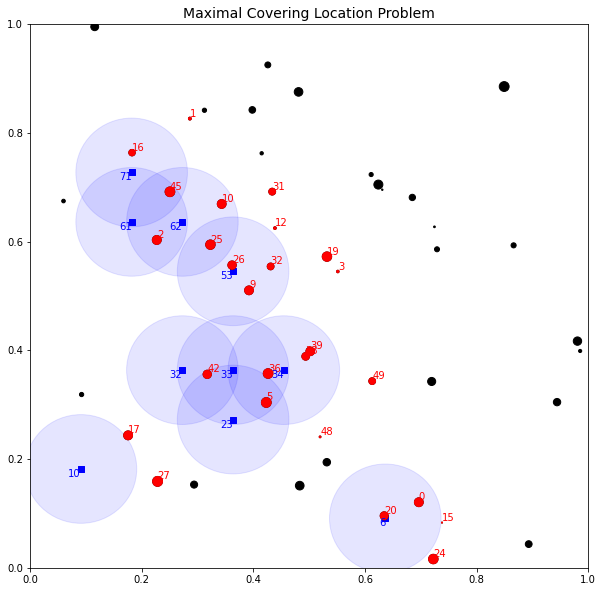

In [166]:
import matplotlib.pyplot as plt
def plot_solution():
    """plots solution found by heuristic"""

    facility = np.genfromtxt('facility.csv', delimiter=',', skip_header=1)
    demand = np.genfromtxt('demand.csv', delimiter=',', skip_header=1)    
    sited_id = np.genfromtxt('sited_id.csv', delimiter=',', skip_header=1, dtype=int)
    covered_id = np.genfromtxt('covered_id.csv', delimiter=',', skip_header=1, dtype=int)

    #print(facility.shape) 
    print(sited_id.shape)
    print(covered_id.shape)
    #print(sited_id.dtype)

    #print(facility[sited_id,:])

    fig, ax = plt.subplots(figsize=(10,10))

    # plot buffers 
    for x,y in zip(facility[sited_id,0], facility[sited_id,1]):
        circle1 = plt.Circle((x,y), 0.1, color='b', alpha=.1)
        ax.add_patch(circle1)

    # plot facilities
    #ax.scatter(facility[:,0], facility[:,1], s = facility[:,2], color='k')
    ax.scatter(facility[sited_id,0], facility[sited_id,1], color='b', marker='s')

    # plot demand
    ax.scatter(demand[:,0], demand[:,1], s = demand[:,2], color='k')
    ax.scatter(demand[covered_id,0], demand[covered_id,1], s=demand[covered_id,2], color='red')

    # label demand points
    for txt in covered_id:
        ax.annotate(txt, demand[txt,0:2], color='r', va='bottom', ha='left')

    # label facility points
    for txt in sited_id:
        ax.annotate(txt, facility[txt,0:2], color='b', va='top', ha='right')

    
    #circle1 = plt.Circle(facility[sited_id,0], facility[sited_id,1], 0.1, color='g')

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title('Maximal Covering Location Problem', fontsize=14)

plot_solution()

In [124]:
coverage[5]

[0, 20]

In [171]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [174]:
demand = np.genfromtxt('demand.csv', delimiter=',', skip_header=1)
sum(demand[:,2])

2544.0

In [ ]:
def greedy_sort():
    """sorts the facilities so that they do not overlap with one another"""
    demand = np.genfromtxt('demand.csv', delimiter=',', skip_header=1)
    dtype = [('facility', int), ('population', float)]
    total_pop = np.genfromtxt('total_pop.csv', delimiter=',', skip_header=1, dtype=dtype)

    